<h3>CMM Sample Data Principal Components Analysis - Results and Interpretation</h3>

__Notebook Initial Creation:__ 1/16/2017 <br>
__Author:__ pjparis

<h4>Initial Data Load:</h4>

In [1]:
fpath='/Users/paulp/GoogleDrive/projects/ContinentalMarginMapping/data/GCS_EDA_sampling/'
file='CMM_20krandompnts.csv'

df = pd.read_csv(fpath+file, names=['ID','CrustThk','Elevation','Magnetic','Gravity','gForms'], skiprows=1).dropna()

<h4>Data Preprocessing:</h4>

In [59]:
# import the scikit PCA, Standardizer, and Matplotlib plotting handlers:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

%matplotlib inline

# Added 1/18/2017: multiply crustal thickness field by -1 to render these as positive values. Prior were all measured as
# distances from sea level to base of crust (Moho) as so < 0:
df.CrustThk = df.CrustThk* -1

# build the arrays needed for PCA from the df:
X = df.ix[:,1:5]      # extract the fields in df that will participate in the PCA
y = df.ix[:,5]        # extract the geomorphon type classifier field only

# standardize (mean=0, sd=1) the X array prior to generating covariance matrix:
X_std = StandardScaler().fit_transform(X)

# generate the covariance matrix from the standardized X data:
# NOTE that you could also run the PCA on the correlation matrix of X (same thing, right?)
X_cov = np.cov(X_std.T)
print('Standardized Covariance Matrix:\n', X_cov)

Standardized Covariance Matrix:
 [[ 1.00005175  0.90563622  0.01321336 -0.92149715]
 [ 0.90563622  1.00005175  0.00943652 -0.97859544]
 [ 0.01321336  0.00943652  1.00005175 -0.00664968]
 [-0.92149715 -0.97859544 -0.00664968  1.00005175]]


<h4>'Fit' the PCA Model:</h4>

In [62]:
Y = PCA(n_components=4).fit(X_std)

e_vecs = Y.components_.T                 # the eigenvectors (transposing places vec components in single list)
e_vals = Y.explained_variance_           # the eigenvalues

print('Results:\n')
print('Eigenvectors:\n', e_vecs)
print('')
print('Eigenvalues:\n', e_vals)
print('')
print('Variance explained by each principal component:\n', Y.explained_variance_ratio_)
print('')
print('Percentage of variance explained by each principal component:\n', Y.explained_variance_ratio_ * 100)
print('')
print('Cumulative percentage variance explained by each principal component:\n', np.cumsum(Y.explained_variance_ratio_*100))

Results:

Eigenvectors:
 [[ 0.56824898  0.0010699  -0.81815639 -0.08781836]
 [ 0.58023344  0.00578616  0.4740883  -0.66222047]
 [ 0.00901297 -0.99994526  0.00468264  0.00251241]
 [-0.58338753 -0.00865151 -0.32532826 -0.74414089]]

Eigenvalues:
 [ 2.87089545  0.99987373  0.10877096  0.02045986]

Variance explained by each principal component:
 [ 0.71772386  0.24996843  0.02719274  0.00511496]

Percentage of variance explained by each principal component:
 [ 71.77238635  24.99684329   2.71927398   0.51149639]

Cumulative percentage variance explained by each principal component:
 [  71.77238635   96.76922964   99.48850361  100.        ]


<h4>Creating the Scree Plot for the Computed Principal Components:</h4>

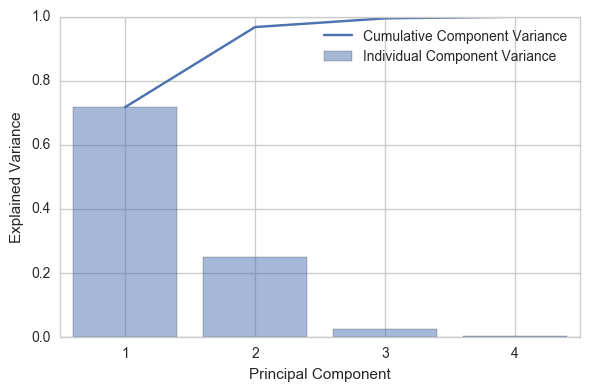

In [5]:
# Creating the scree plot, or something similar, as a visual aid in distinguishing between significant and not-significant
# principal components...

npc = range(1, Y.n_components_+1)   # Y.n_components_ was computed earlier as part of the PCA model fit...

with plt.style.context('seaborn-whitegrid'):
    plt.plot(npc, np.cumsum(Y.explained_variance_ratio_), label='Cumulative Component Variance')
    plt.bar(npc, Y.explained_variance_ratio_, alpha = 0.5, align='center',label='Individual Component Variance')
    plt.xticks([1,2,3,4])
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [63]:
### if we want to preserve explanation for 95% of the variance measured in the original data (X), we require p
### principal components to be retained...

print('To retain a variance accountability level of 95%, you should retain the first', PCA(0.965).fit(X_std).n_components_, 'principal components')


To retain a variance accountability level of 95%, you should retain the first 2 principal components


<h4>Interpreting the Initial Results:</h4>

__Variance Accounting:__
- Principal Component 1:  71.8%
- Principal Component 2:  25%
- Principal Component 3:  2.7%
- Principal Component 4:  0.5%

Principal components 1 and 2 account for ~72 and 25 percent, respectively, or in total about 97% of the variance in the original data. The remaining components, 3 and 4, account for less than 3%, so we can (IMHO) safely discard these two 
components, and focus all further attention on interpreting PC1 and PC2...

<h4>Further Interpretation(s) - Plot the Principal Component Loadings:</h4>

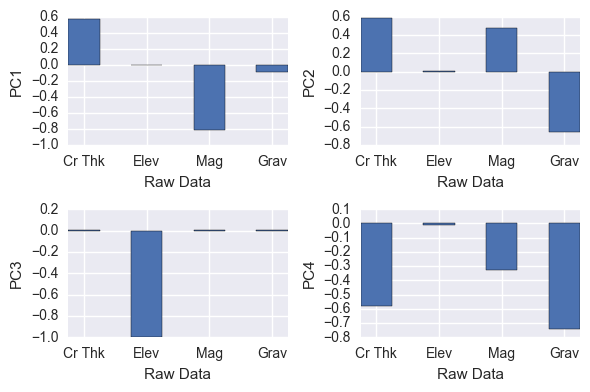

In [64]:
# The Principal Component Loadings map the Eigenvector coefficients back to the original variables in the data set. This
# then helps to ascertain and interpret the contribution of the original data to each principal component 
# (Eigenvector, Eignevalue set)

# the original variables: ['X1', 'X2', 'X3', 'X4' ]  map to crustal thkness, elevation, magnetism, and gravity, respectively
# the Eigenvectors are retrieved from the model as the components_: Y.components_.T
#
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

e_vecs = Y.components_.T 

# Set the ticks and ticklabels for all axes
plt.setp(((ax1,ax2), (ax3,ax4)), xticks=[1,2,3,4], xticklabels=['Cr Thk', 'Elev', 'Mag', 'Grav' ], xlabel=('Raw Data'))

ax1.bar([1, 2, 3, 4 ], e_vecs[0], width=0.5, align='center' )
ax1.set_ylabel('PC1')

ax2.bar([1, 2, 3, 4 ], e_vecs[1], width=0.5, align='center' )
ax2.set_ylabel('PC2')

ax3.bar([1, 2, 3, 4 ], e_vecs[2], width=0.5, align='center' )
ax3.set_ylabel('PC3')

ax4.bar([1, 2, 3, 4 ], e_vecs[3], width=0.5, align='center' )
ax4.set_ylabel('PC4')

fig.tight_layout()
plt.show()

In [68]:
# One rule of thumb--and there are probably many--for determining significance (that is, whether or not to consider a 
# particular loading in interpreting the principal component) of loadings is to set a threshold based on the the 
# assumption that each of the original observation variables (crustal thickness, elevation, magnetism, and gravity) 
# contributes an equal amount to the result. With this, we can use the following to compute a significance 
# (accept or ignore) threshold for the loadings (a.k.a. the Eigenvector components) in interpreting the principal components:

# use the square root of 1 over the number of variables (n) in the original data:
import math
n = 4
print('Eigenvector loading acceptance threshold for', n, 'variables is:', str(math.sqrt(1/n)))

Eigenvector loading acceptance threshold for 4 variables is: 0.5


Focusing our attention on only the first two principal components (PC1 and PC2) we see that:

- for PC1 the component appears to represent the inverse relationship between crustal thickness and local/regional magnetic anomalies. Almost 72% of the variance can be attributed to crustal thickness and magnetism. Gravity and elevation are of no real significance (below the loading acceptance threshold).

- for PC2 the component appears to represent once more a coupling of crustal thickness and gravity. Magnetism falls in accord with thickness, but at 0.44 is just below our loading acceptance threshold, and so we choose to ignore its influence (once which we've already accounted for in PC1. Again, elevation's role is tiny and so can be ignored. Thus, we see that the combination of crustal thickness, magnetism, and gravity account for about 97% of the variance seen in the data.

- for PC3, elevation's contribution to the total system variance is noted--though it doesn't contribute very much, overall (about another 2.7%). If we consider the topo/bathy data we can account for 99% of the total variance. 

<h4>Projecting the raw data into the new PC coordinate space </h4>
_converting the original sample observations to their principal component scores_

The general projection is: $Yp=e_1X_1+e_2X_2+...+e_nX_n$

where: <br>
$e_i$ are the component eigenvectors (PC loadings) for each of the original measurement (sampling) variables, and <br>
$X_i$ are the sampled variable values, standardized in this instance (e.g., $X_1$ is crustal thickness, $X_2$ is elevation)

__Geomorphon feature type mappings:__
- 1 Flat
- 2 Summit
- 3 Ridge
- 4 Shoulder
- 5 Spur
- 6 Slope
- 7 Hollow
- 8 Footslope
- 9 Valley
- 10 Depression

/Users/paulp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/paulp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


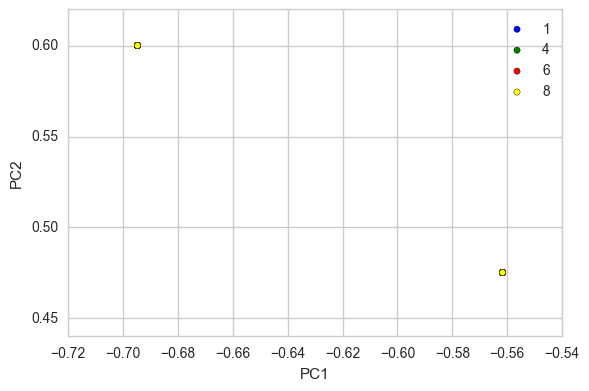

In [82]:
# We're only going to proceed with the first two principal components PC1 and PC2

Yp = PCA(n_components=4).fit_transform(X_std)  # must transform standardized, not raw, originals!

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip((1,4,6,8),('blue','green','red','yellow')):
        plt.scatter(Yp[y==lab, 0],
                    Yp[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
